<a href="https://colab.research.google.com/github/Falakejaz786/scraping/blob/main/Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q groq beautifulsoup4 requests chromadb sentence-transformers textstat gtts playwright
!playwright install chromium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.1 MB/s eta 0

In [2]:
import requests
from bs4 import BeautifulSoup
import textstat
from gtts import gTTS
from IPython.display import Audio, Image, display
from getpass import getpass
from groq import Groq
import chromadb
from chromadb.config import Settings
from sentence_transformers import SentenceTransformer
from playwright.async_api import async_playwright
import asyncio
import random

In [3]:
groq_api_key = getpass("Enter your Groq API Key: ")
client = Groq(api_key=groq_api_key)
print("Groq Client initialized.")

Enter your Groq API Key: ··········
Groq Client initialized.


In [7]:
GROQ_MODEL = "llama3-8b-8192"
print(f"Using model: {GROQ_MODEL}")

Using model: llama3-8b-8192


In [5]:
async def take_screenshot(url, filename="chapter_screenshot.png"):
    async with async_playwright() as p:
        browser = await p.chromium.launch()
        page = await browser.new_page()
        await page.goto(url)
        await page.screenshot(path=filename, full_page=True)
        await browser.close()
    print(f"Screenshot saved: {filename}")

def show_screenshot(filename="chapter_screenshot.png"):
    display(Image(filename))

Enter URL to screenshot: https://en.wikisource.org/wiki/The_Gates_of_Morning/Book_1/Chapter_1
Screenshot saved: chapter_screenshot.png


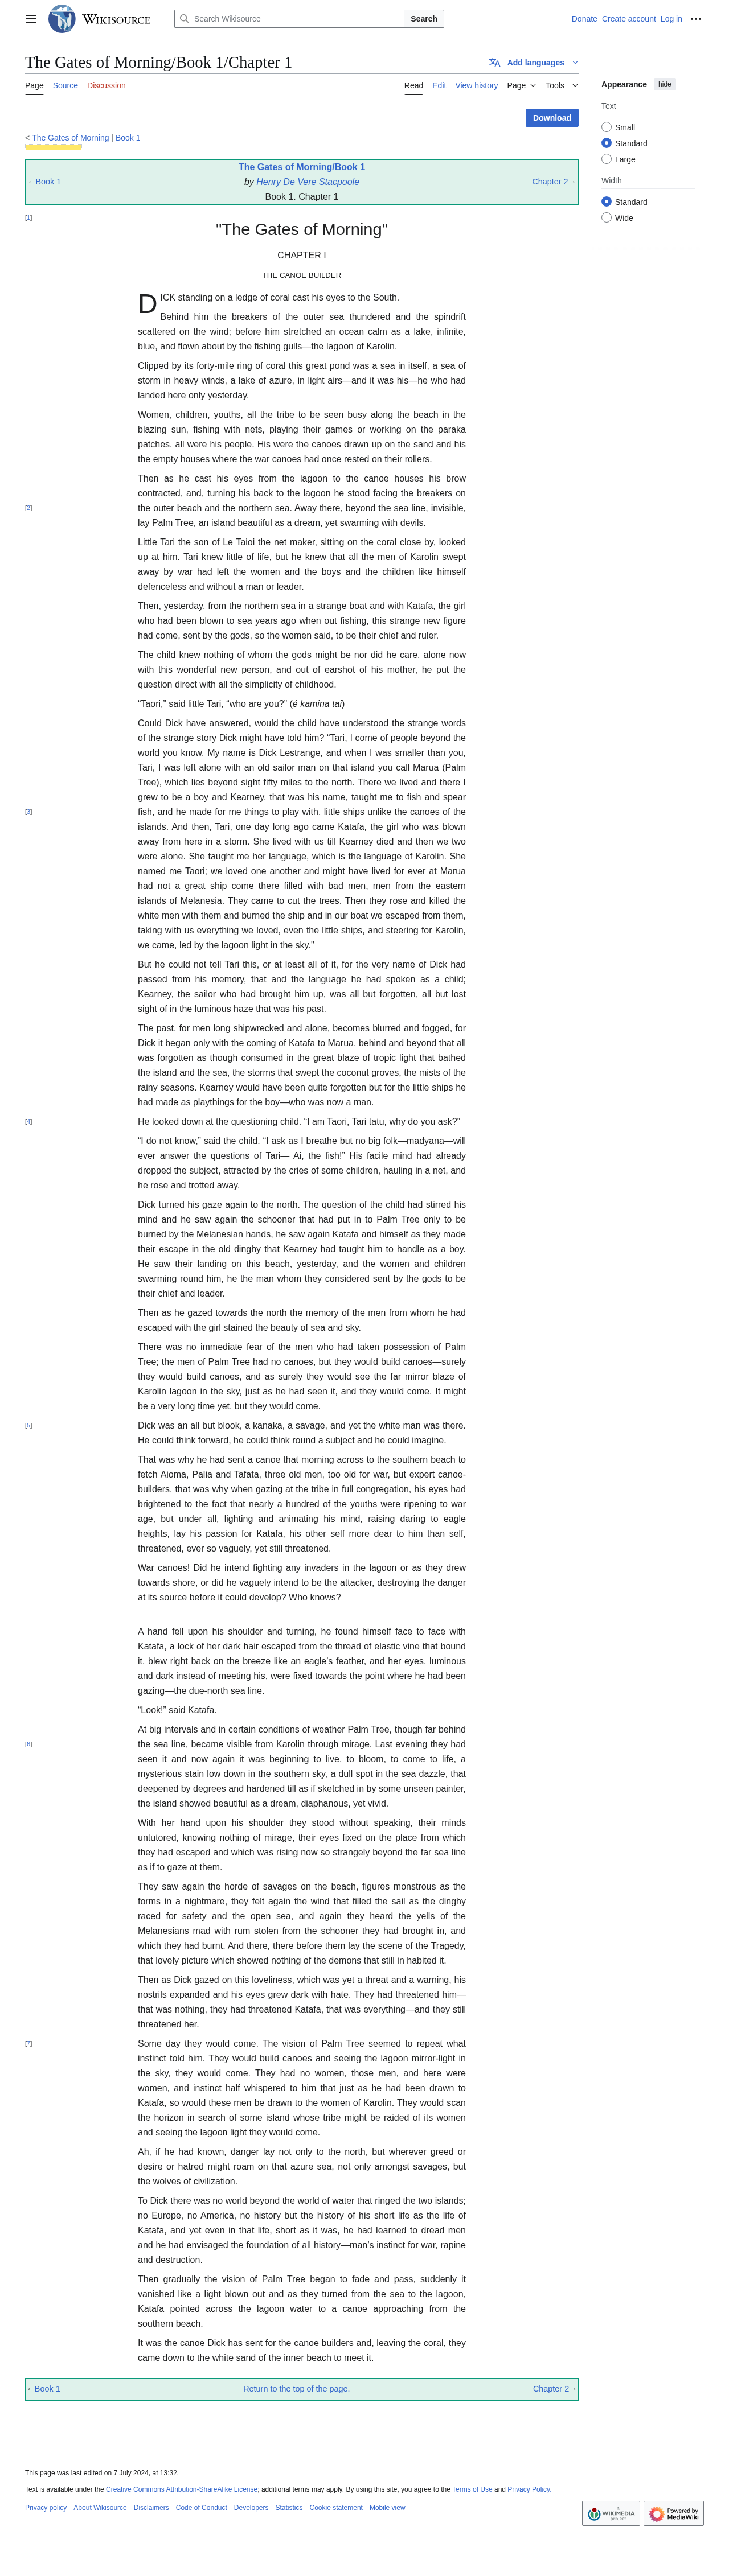

In [6]:
url_for_screenshot = input("Enter URL to screenshot: ").strip()
await take_screenshot(url_for_screenshot)
show_screenshot()

In [8]:
def scrape_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup.get_text(separator="\n")

def reward_scraping(text):
    length_reward = 1 if len(text) > 500 else 0
    paragraph_reward = 1 if text.count('\n\n') > 3 else 0
    return length_reward + paragraph_reward

In [9]:
scrape_url = input("Enter URL to scrape: ").strip()
raw_text = scrape_text(scrape_url)

print("\nScraped Text Preview (first 500 chars):\n")
print(raw_text[:500])

scraping_reward = reward_scraping(raw_text)
print(f"\nScraping Reward: {scraping_reward}")

Enter URL to scrape: https://en.wikisource.org/wiki/The_Gates_of_Morning/Book_1/Chapter_1

Scraped Text Preview (first 500 chars):









The Gates of Morning/Book 1/Chapter 1 - Wikisource, the free online library




















































Jump to content
















Main menu












Main menu


move to sidebar


hide







		Navigation
	






Main Page
Community portal
Central discussion
Recent changes
Subject index
Authors
Random work
Random author
Random transcription
Help
Special pages











		Display Options
	










































Search




















Scraping Reward: 2


In [10]:
def ai_writer(text, client, model=GROQ_MODEL):
    prompt = f"Rewrite this chapter in modern style:\n\n{text}"
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

def ai_reviewer(text, client, model=GROQ_MODEL):
    prompt = f"Improve clarity, grammar, and readability:\n\n{text}"
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

In [11]:
spun_text = ai_writer(raw_text[:2000], client)

print("\nAI Writer Output Preview (first 500 chars):\n")
print(spun_text[:500])


AI Writer Output Preview (first 500 chars):

Here is a rewritten version of Chapter 1 of "The Gates of Morning" in a modern style:

The Gates of Morning/Book 1/Chapter 1 - The Canoe Builder

As Dick stood on the coral ledge, he gazed out at the endless expanse of the South Pacific. The rhythmic pounding of the waves against the outer reef created a soothing background noise that helped him focus on the task ahead.

Behind him, the wispy remnants of a distant storm still lingered, casting a misty veil over the lagoon. The air was heavy with


In [12]:
reviewed_text = ai_reviewer(spun_text, client)

print("\nAI Reviewer Output Preview (first 500 chars):\n")
print(reviewed_text[:500])


AI Reviewer Output Preview (first 500 chars):

Here is a rewritten version of Chapter 1 of "The Gates of Morning" in a modern style, improved for clarity, grammar, and readability:

Chapter 1: The Canoe Builder

Dick stood on the coral ledge, gazing out at the endless expanse of the South Pacific. The rhythmic pounding of the waves against the outer reef created a soothing background hum, helping him focus on the task at hand. Behind him, the wispy remnants of a distant storm still lingered, casting a misty veil over the lagoon. The air was 


In [13]:
def reward_novelty(text):
    return 1 if len(text.split()) > 100 else 0

def reward_readability(text):
    return 1 if textstat.flesch_reading_ease(text) > 50 else 0

In [14]:
novelty_reward = reward_novelty(spun_text)
readability_reward = reward_readability(reviewed_text)

print(f"Novelty Reward: {novelty_reward}")
print(f"Readability Reward: {readability_reward}")

Novelty Reward: 1
Readability Reward: 1


In [15]:
def simulate_rl_loop(original_text, client, n_iters=3):
    logs = []
    current_text = original_text
    for i in range(n_iters):
        spun = ai_writer(current_text, client)
        reviewed = ai_reviewer(spun, client)

        r_scrape = reward_scraping(current_text)
        r_novelty = reward_novelty(spun)
        r_read = reward_readability(reviewed)

        total_reward = r_scrape + r_novelty + r_read
        logs.append({"iteration": i, "reward": total_reward})

        print(f"\nIteration {i} Reward: {total_reward}")
        current_text = reviewed

    return current_text, logs

In [16]:
final_ai_text, rl_logs = simulate_rl_loop(raw_text, client, n_iters=3)

print("\nRL Reward Logs:")
for log in rl_logs:
    print(log)


Iteration 0 Reward: 4

Iteration 1 Reward: 4

Iteration 2 Reward: 4

RL Reward Logs:
{'iteration': 0, 'reward': 4}
{'iteration': 1, 'reward': 4}
{'iteration': 2, 'reward': 4}


In [17]:
def human_edit(text):
    print("\nAI Reviewed Text Preview:")
    print(text[:500])
    user_input = input("\nEdit the text or press Enter to accept:\n").strip()
    return user_input if user_input else text

In [18]:
final_text = human_edit(final_ai_text)

print("\nFinal Text Preview (first 500 chars):\n")
print(final_text[:500])


AI Reviewed Text Preview:
Here is a rewritten version of the chapter with improved clarity, grammar, and readability:

**Chapter 1: The Canoe Builder**

As Dick stood on the coral ledge, he gazed out at the vast lagoon, the roar of the outer sea echoing in the distance. The wind whipped the sea spray into a frenzy, and the village behind him hummed with activity. Women, children, and youths went about their daily routines: fishing, playing, or tending to their gardens. The canoes, pulled up on the sand, and the empty hou

Edit the text or press Enter to accept:
**Chapter 1: The Canoe Maker**  Dick stood on the coral ledge, surveying the endless lagoon while the thunder of waves crashed on the reef. A salty wind lashed his face. Behind him, the village buzzed with life. Children laughed and played, women wove baskets and mended nets, and men prepared the canoes resting on the white sand. The sea felt both inviting and dangerous, its power always present in the roar beyond the reef.

Fi

In [19]:
def text_to_speech(text, filename="final_audio.mp3"):
    tts = gTTS(text)
    tts.save(filename)
    return Audio(filename)

In [20]:
audio = text_to_speech(final_text)
print("\nPlaying Generated Audio:")
display(audio)


Playing Generated Audio:


In [21]:
chroma_client = chromadb.Client(Settings())
collection = chroma_client.create_collection("books_version")
embedder = SentenceTransformer('all-MiniLM-L6-v2')

def add_version(name, text):
    vec = embedder.encode(text).tolist()
    collection.add(ids=[name], documents=[text], embeddings=[vec])
    print(f"Added version: {name}")

def search_versions(query, n_results=2):
    vec = embedder.encode(query).tolist()
    return collection.query(query_embeddings=[vec], n_results=n_results)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [22]:
add_version("original", raw_text)
add_version("ai_final", final_ai_text)
add_version("human_final", final_text)

Added version: original
Added version: ai_final
Added version: human_final


In [23]:
query = input("\nEnter a semantic search query: ").strip()
results = search_versions(query)

print("\nSearch Results (IDs):")
print(results['ids'])

print("\nDocuments Preview:")
for doc in results['documents'][0]:
    print(doc[:300] + "\n---\n")



Enter a semantic search query: summary of chapter one

Search Results (IDs):
[['ai_final', 'human_final']]

Documents Preview:
Here is a rewritten version of the chapter with improved clarity, grammar, and readability:

**Chapter 1: The Canoe Builder**

As Dick stood on the coral ledge, he gazed out at the vast lagoon, the roar of the outer sea echoing in the distance. The wind whipped the sea spray into a frenzy, and the v
---

**Chapter 1: The Canoe Maker**  Dick stood on the coral ledge, surveying the endless lagoon while the thunder of waves crashed on the reef. A salty wind lashed his face. Behind him, the village buzzed with life. Children laughed and played, women wove baskets and mended nets, and men prepared the ca
---

